In [1]:
# import libs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
sns.set_theme(style="darkgrid")

In [2]:
# load the datasets
acc_info = pd.read_csv(r"C:\Users\Mahmoud\OneDrive\Desktop\Data Camp\project\Customer Churn in fit.ly\Datasets\account_info.csv")
cust_supp = pd.read_csv(r"C:\Users\Mahmoud\OneDrive\Desktop\Data Camp\project\Customer Churn in fit.ly\Datasets\customer_support.csv")
user_act = pd.read_csv(r"C:\Users\Mahmoud\OneDrive\Desktop\Data Camp\project\Customer Churn in fit.ly\Datasets\user_activity.csv")


In [3]:
# data overview
acc_info.head()

,customer_id,email,state,plan,plan_list_price,churn_status
0,C10000,user10000@example.com,New Jersey,Enterprise,105,Y
1,C10001,user10001@example.net,Louisiana,Basic,22,Y
2,C10002,user10002@example.net,Oklahoma,Basic,24,NaN
3,C10003,user10003@example.com,Michigan,Free,0,NaN
4,C10004,user10004@example.com,Texas,Enterprise,119,NaN


In [4]:
cust_supp.head()

,ticket_time,user_id,channel,topic,resolution_time_hours,state,comments
0,2025-06-13 05:55:17.154573,10125,chat,technical,11.48,1,NaN
1,2025-08-06 13:21:54.539551,10109,chat,account,1.01,0,NaN
2,2025-08-22 12:39:35.718663,10149,chat,technical,10.09,0,Erase my data from your systems.
3,2025-06-07 02:49:46.986055,10268,phone,account,9.10,1,NaN
4,2025-07-25 00:24:38.945079,10041,phone,other,2.28,1,NaN


In [5]:
user_act.head()

,event_time,user_id,event_type
0,2025-09-08 15:05:39.422721,10118,watch_video
1,2025-09-08 08:15:05.264103,10220,watch_video
2,2025-11-14 06:28:35.207671,10009,share_workout
3,2025-08-20 16:53:38.682901,10227,read_article
4,2025-07-24 16:47:31.728422,10123,track_workout


In [6]:
# data shape
print(acc_info.shape)
print(cust_supp.shape)
print(user_act.shape)

(400, 6)
(918, 7)
(445, 3)


# account information entity
### no duplicates rows in the table
### customer_id
- no nulls
- no duplicate
- remove C latter from the column to match the keys in the other 
- column type : object
### email
- no further cleaning for this col
- column type : object
### state 
- no further cleaning for this col
- column type : object
### plan
- no NULL
- no further cleaning for this col
- column type : change from object to category
### plan_list_price
- no nulls
- no negative values
- column type : int
### churn_status
- replace null values with N 
- column type : change from object to category

In [7]:
# data cleaning and validation for acc_info 
# remove duplicate
acc_info.drop_duplicates()
acc_info.shape

acc_info.isna().sum() 

# customer_id col
acc_info[acc_info['customer_id'].duplicated()]

acc_info['customer_id'] = acc_info['customer_id'].str.lstrip('C')

# state col
acc_info['state'].nunique()

# plan
print(acc_info['plan'].value_counts())
acc_info['plan'] = acc_info['plan'].astype('category')

# plan_list_price col
acc_info[acc_info['plan_list_price'] < 0]

# churn_status
acc_info['churn_status'] = acc_info['churn_status'].fillna('N')
acc_info['churn_status'].isna().sum()
acc_info['churn_status'] = acc_info['churn_status'].astype('category')

acc_info.info()


plan
Basic         118
Free          105
Enterprise     92
Pro            85
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   customer_id      400 non-null    object  
 1   email            400 non-null    object  
 2   state            400 non-null    object  
 3   plan             400 non-null    category
 4   plan_list_price  400 non-null    int64   
 5   churn_status     400 non-null    category
dtypes: category(2), int64(1), object(3)
memory usage: 13.7+ KB


# customer support
### no duplicates rows in the table
### ticket_time
- no nulls
- no further cleaning for this col
- change data type from object to datetime ('ISO8601') format
### user_id	
- no nulls
- no further cleaning for this
- change from int to object
### channel
- no null
- change (-) values to chat because its the easiest channel 
- change from object to category
### topic
- no null
- no further cleaning for this
- change from object to category
### resolution_time_hours	
- no nulls
- no negative values
- float
### state >> ticket_state
- no nulls
- change column name from state to ticket_state to avoid confusing with the state col(acc_info) during joining
- leave it as 1 and 0 to better performance to change it late in charts (1 = Open ) (0 = Closed )
- change from int to category
### comments
- replace nulls with keep_data
- replace every comment with erase
- object

In [8]:
# data cleaning and validation for cust_supp 

# remove duplicate
cust_supp.drop_duplicates()
cust_supp.shape

# ticket_time col
cust_supp['ticket_time'].isna().sum()

# change into datetime
cust_supp['ticket_time'] = pd.to_datetime(cust_supp['ticket_time'], format='ISO8601')

# user_id col
cust_supp['user_id'].isna().sum()
cust_supp['user_id'] = cust_supp['user_id'].astype(str)

# channel col
cust_supp['channel'].value_counts()

cust_supp['channel'] = cust_supp['channel'].str.replace('-' , 'chat') 

cust_supp['channel'].value_counts()

cust_supp['channel'].isna().sum()

# change data type
cust_supp['channel'] = cust_supp['channel'].astype('category')

# topic
cust_supp['topic'].isna().sum()

cust_supp['topic'].value_counts()

# change data type
cust_supp['topic'] = cust_supp['topic'].astype('category')

# resolution_time_hours
cust_supp[cust_supp['resolution_time_hours'] < 0]

# state col
# cust_supp['state'].value_counts()

# change col name to ticket_state
cust_supp.rename(columns={'state': 'ticket_state'}, inplace=True)
cust_supp['ticket_state'].isna().sum()

# change data type
cust_supp['ticket_state'] = cust_supp['ticket_state'].astype('category')

# comments # erase  or # keep data
cust_supp['comments'].value_counts()
# cust_supp['comments'] = cust_supp['comments'].where(cust_supp['comments'].isna(), 'erase') 
cust_supp.loc[cust_supp['comments'].notna(), 'comments'] = 'erase'
cust_supp['comments'] =  cust_supp['comments'].fillna('keep_data')

# customer support validation
cust_supp.info()
cust_supp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ticket_time            918 non-null    datetime64[ns]
 1   user_id                918 non-null    object        
 2   channel                918 non-null    category      
 3   topic                  918 non-null    category      
 4   resolution_time_hours  918 non-null    float64       
 5   ticket_state           918 non-null    category      
 6   comments               918 non-null    object        
dtypes: category(3), datetime64[ns](1), float64(1), object(2)
memory usage: 32.0+ KB


,ticket_time,user_id,channel,topic,resolution_time_hours,ticket_state,comments
0,2025-06-13 05:55:17.154573,10125,chat,technical,11.48,1,keep_data
1,2025-08-06 13:21:54.539551,10109,chat,account,1.01,0,keep_data
2,2025-08-22 12:39:35.718663,10149,chat,technical,10.09,0,erase
3,2025-06-07 02:49:46.986055,10268,phone,account,9.10,1,keep_data
4,2025-07-25 00:24:38.945079,10041,phone,other,2.28,1,keep_data


# user activity table
### table does not contain nulls
### event_time	
- no nulls
- no further cleaning for this
- change data type from object to datetime ('ISO8601') format
### user_id
- no nulls
- no further cleaning for this
-  change data type from int to object
### event_type
- no nulls
- object

In [9]:
# data cleaning and validation for user_act 
user_act.info()

# event_time
user_act['event_time'] = pd.to_datetime(user_act['event_time'] , format = 'ISO8601')

# user_id col
user_act['user_id'] = user_act['user_id'].astype(str)

# event_type col
user_act['event_type'].value_counts()

# event_time	user_id	event_type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event_time  445 non-null    object
 1   user_id     445 non-null    int64 
 2   event_type  445 non-null    object
dtypes: int64(1), object(2)
memory usage: 10.6+ KB


event_type
read_article     125
watch_video      120
track_workout    108
share_workout     92
Name: count, dtype: int64

# join tables
customer churn analysis so we want one row for each customer show the important information we need for analysis
### Aggregation on tables
#### account information
##### make a copy of it
#### customer support
##### keep the important columns for analysis
- group  by user id
###### create new columns
- tickets_count : number of tickets for each customer
- avg_resolution_time : average time for tickets to resolution for each customer
- max_resolution_time : max time for tickets to resolution for each customer
#### user activity
##### keep the important columns for analysis
- group  by user id
###### create new columns
- events_count : number of events for each user
- active_days : how many day the user was active
### note : 
- the duplicate columns ('user_id_x', 'user_id_y') had been removed
- replace nulls with zero in all numeric columns

In [10]:
# joining tables
acc_info_c = acc_info.copy()

# cust_supp agg
cust_supp_feat = cust_supp.groupby('user_id').agg(tickets_count = ('ticket_time', 'count'),\
                                                  avg_resolution_time = ('resolution_time_hours', 'mean'),\
                                                   max_resolution_time = ('resolution_time_hours', 'max')).reset_index()
# user_act agg
user_act_feat = user_act.groupby('user_id').agg(  events_count = ('event_time', 'count'),\
                                                  active_days = ('event_time', 'nunique')).reset_index()
# acc_info agg
df = acc_info_c.merge( cust_supp_feat , left_on = 'customer_id' , right_on = 'user_id' , how = 'left')\
                .merge( user_act_feat , left_on = 'customer_id' , right_on = 'user_id' , how = 'left')

# delete duplicate columns 
df = df.drop(columns=['user_id_x', 'user_id_y'])

# replace nulls with zero
num_cols = df.select_dtypes(include=['number']).columns
df[num_cols] = df[num_cols].fillna(0)

df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   customer_id          400 non-null    object  
 1   email                400 non-null    object  
 2   state                400 non-null    object  
 3   plan                 400 non-null    category
 4   plan_list_price      400 non-null    int64   
 5   churn_status         400 non-null    category
 6   tickets_count        400 non-null    float64 
 7   avg_resolution_time  400 non-null    float64 
 8   max_resolution_time  400 non-null    float64 
 9   events_count         400 non-null    float64 
 10  active_days          400 non-null    float64 
dtypes: category(2), float64(5), int64(1), object(3)
memory usage: 29.4+ KB


(400, 11)

# Descriptive analysis & Exploratory Analysis
### Two different types of graphic showing single variables only 
#### Distribution of Tickets Count
- show the distribution in number of tickets to see the dissatisfaction risk
- show the number of customers churn 
### one graphic showing two or more variables 
- Average Tickets by Churn Status
- Number of churn per plan
### Description of findings 
- The majority of customers have 1–4 support tickets, while a smaller segment shows high ticket frequency, indicating potential dissatisfaction risk.
- The overall churn rate is 28%, indicating that nearly one in three customers discontinue the service. This level of attrition represents a significant revenue leakage and highlights the need for immediate retention strategies.
- no significant change in the average of tickets for chrun status (average of yes =  2.45) (average of no = 2.23)
- The Free plan exhibits a significantly higher churn rate (41%) compared to paid plans (~22–26%). This suggests that free-tier users are less engaged and more likely to discontinue service. Converting free users to paid plans or improving free-tier engagement could significantly reduce overall churn.

In [11]:
df.head()

,customer_id,email,state,plan,plan_list_price,churn_status,tickets_count,avg_resolution_time,max_resolution_time,events_count,active_days
0,10000,user10000@example.com,New Jersey,Enterprise,105,Y,3.0,21.446667,23.77,3.0,3.0
1,10001,user10001@example.net,Louisiana,Basic,22,Y,4.0,17.542500,26.44,1.0,1.0
2,10002,user10002@example.net,Oklahoma,Basic,24,N,3.0,6.433333,10.32,1.0,1.0
3,10003,user10003@example.com,Michigan,Free,0,N,1.0,2.190000,2.19,1.0,1.0
4,10004,user10004@example.com,Texas,Enterprise,119,N,4.0,8.542500,10.45,4.0,4.0


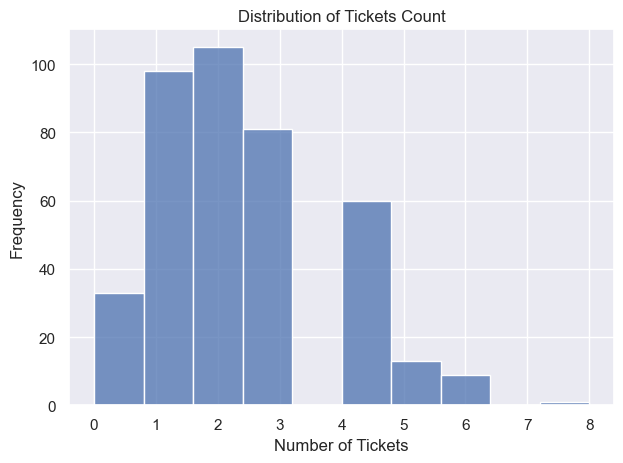

In [12]:
# Distribution of Tickets Count
plt.figure()

sns.histplot( df , x = 'tickets_count' , bins = 10 )

plt.title('Distribution of Tickets Count')
plt.xlabel('Number of Tickets')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


churn_status
N    0.715
Y    0.285
Name: proportion, dtype: float64


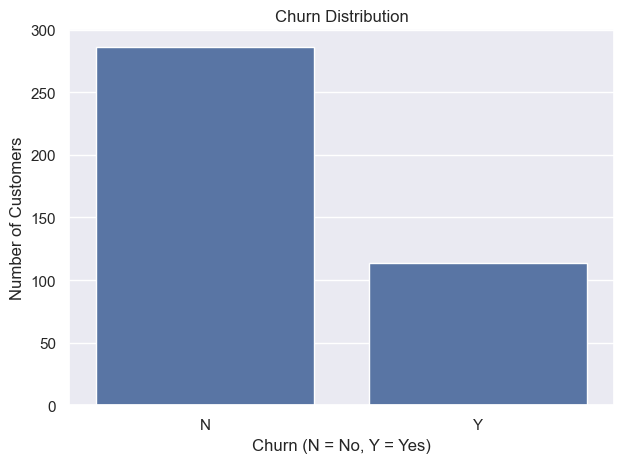

In [13]:
# Churn Rate Distribution
print(df['churn_status'].value_counts(normalize = True))

plt.figure()

sns.countplot( df , x = 'churn_status')

plt.title('Churn Distribution')
plt.xlabel('Churn (N = No, Y = Yes)')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()


C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_19984\3417379997.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tic = df.groupby('churn_status')['tickets_count'].mean()


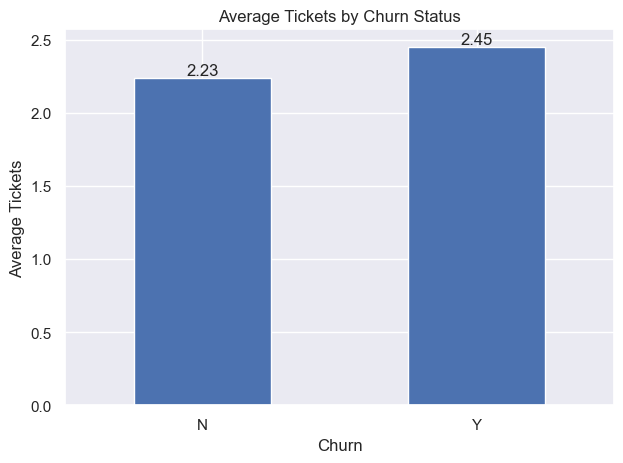

In [14]:
# Average Tickets by Churn Status
plt.figure()

avg_tic = df.groupby('churn_status')['tickets_count'].mean()
ax = avg_tic.plot( kind = 'bar' )

plt.title('Average Tickets by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Average Tickets')

for i, value in enumerate(avg_tic):
    ax.text(i, value, f'{value:.2f}', ha='center', va='bottom')
    
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


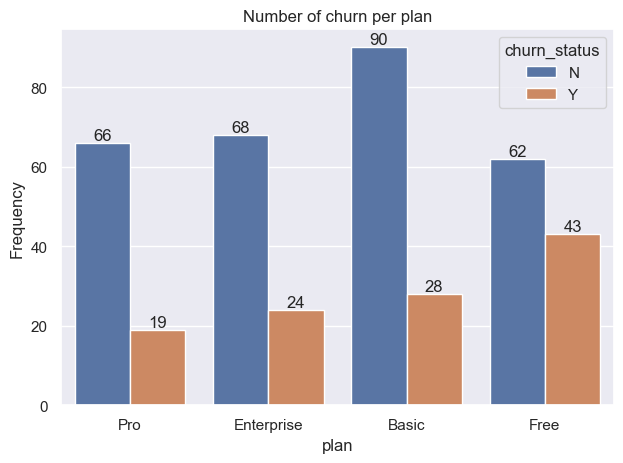

plan
Basic         23.73
Enterprise    26.09
Free          40.95
Pro           22.35
Name: churn_status, dtype: float64


C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_19984\63028168.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = (df.groupby('plan')['churn_status'].apply(lambda x: (x == 'Y').mean() * 100).round(2))


In [15]:
# Number of churn per plan
plt.figure()

order = ['Pro' , 'Enterprise' , 'Basic' , 'Free']
ax = sns.countplot( df , x = 'plan' , hue = 'churn_status' , order = order)

plt.title('Number of churn per plan')
plt.xlabel('plan')
plt.ylabel('Frequency')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# churn rate
churn_rate = (df.groupby('plan')['churn_status'].apply(lambda x: (x == 'Y').mean() * 100).round(2))
print(churn_rate)

# Definition of a Business Metric
## Customer Churn Rate
Current Overall Churn Rate = 28%
## Engagement Level
- Yes : 0.4
- No : 1.4
## Resolution Time
- Yes : 17.87
- No : 6.01
## How Should the Business Monitor It?
### Monthly Dashboard Monitoring to track
- Customer Churn Rate
- Resolution Time
- Engagement Level
#### Reduce overall churn rate from 28% to 22% within 6 months by:

- Decreasing average ticket resolution time by 20%

- Increasing engagement among Free plan users by 15%


In [16]:
# Definition of a Business Metric
# Customer Churn Rate = (Number of Churned Customers / Total Customers) * 100
churn_rate = df['churn_status'].eq('Y').mean() * 100
print(f'Churn Rate: {churn_rate.round(2)}')

# Engagement Level (Events Count)
eng_lev = df.groupby('churn_status')['events_count'].mean()
print(eng_lev)

# Resolution Time
res_tim = df.groupby('churn_status')['avg_resolution_time'].mean()
print(res_tim)

Churn Rate: 28.5
churn_status
N    1.412587
Y    0.359649
Name: events_count, dtype: float64
churn_status
N     6.007807
Y    17.867949
Name: avg_resolution_time, dtype: float64


C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_19984\928980580.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  eng_lev = df.groupby('churn_status')['events_count'].mean()
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_19984\928980580.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  res_tim = df.groupby('churn_status')['avg_resolution_time'].mean()


# Final Summary & Recommendations
The analysis reveals a 28% churn rate, primarily driven by high attrition within the Free plan segment and lower engagement levels among churned users. By focusing on improving onboarding, increasing engagement, and enhancing support responsiveness, the business can significantly reduce revenue leakage and improve customer lifetime value.
